                            PCA: Análise de Componentes Principais
-> O PCA é um algoritmo de redução de dimensionalidade. Seu principal objetivo
é simplificar um dataset complexo, com muitas variáveis (colunas), transformando-o em um novo conjunto de dados com menos variáveis, mas que ainda mantenha a maior parte da informação original.
                           
                        O conceito chave: Componentes Principais
-> Em vez de simplesmente descartar as colunas o PCA as transforma.

    1. Redirecionamento do Eixo: O PCA encontra as direções (eixos) no espaço de dados onde a variância (dispersão) dos dados é máxima.

    2. Componentes Principais: Essas novas direções são chamadas de componentes principais (PCs).

        * O PC1 (Primeiro Componente Principal) sempre captura a maior variância dos dados

        * O PC2 captura a maior variância restante, e assim por diante.
    
    3. Redução: Ao selecionar apenas os primeiros componentes (por exemplo, PC1 e PC2), você reduz a dimensionalidade drasticamente, retendo 90% ou mais da 
    informação do dataset original.

                    Por que o PCA é essencial no Machine Learning?
-> O pca é usado para resolver 2 grandes problemas:

    1. Melhora da Performance (velocidade): Reduzir o número de features torna o treinamento dos modelos (como Regressão, Classificação ou até Clustering)muito mais rápido.

    2. Combate a Maldição da Dimensionalidade: Em datasets com muitas features, a dispersão dos dados aumenta tanto que os algoritmos de Machine Learning se
    tornam ineficientes, um problema conhecido como "Maldição da Dimensionalidade". O PCA mitiga isso.

    3. Visualização: É impossivel visualizar dados com 100 dimensões. O PCA permite projetar esses dados em 2 ou 3 componentes principais, tornando a visualização de padrões (como clusters) possivel


                        CLASSIFICADOR SEM PCA (STELLAR)

Import das bibliotecas necesssárias 

In [1]:
# Import da biblioteca pandas que tem como objetivo acessar datasets e
# manipular dados.
import pandas as pd

# Import da biblioteca numpy que possibilita manipular arrays
# e realizar cálculos matemáticos. 
import numpy as np

# Biblioteca que possibilita manipular o tempo
import time

Acessando a base de dados stellar

In [2]:
base_de_dados_stellar = pd.read_csv('Dados/star_classification.csv')

Separando as caracteristicas do alvo

In [3]:
# x: Variável que irá conter todas as variáveis preditoras (variáveis que o
# modelo de predição utiliza para prever valores). 

# loc: Função do pandas que tem como objetivo selecionar um intervalo de dados.
# Ele recebe como argumento as linhas que serão selecionadas e as colunas. 

# [:]: Irá selecionar dentro do loc todas as linhas das colunas que serão 
# selecionadas

# base_de_dados_stellar.columns != 'class': Ira selecionar o intervalo de colunas que iremos considerar como caracteristicas. Basicamente, vamos
# selecionar todas as colunas exceto a coluna class (que será a nossa 
# variável alvo). O columns tem como objetivo acessar as colunas do 
# intervalo selecionado
# Values: Irá transformar o intervalo selecionado em um array numpy
# que facilita a manipulação dos dados em modelos de predição.
x = base_de_dados_stellar.loc[:, base_de_dados_stellar.columns != 'class'].values

# y: Irá conter a variável alvo (valor que queremos prever)
# base_de_dados['class']: Ira conter a coluna que é a variável alvo.
# values: Irá transformar o intervalo selecionado em um array numpy
# que facilita a manipulação dos dados em modelos de predição.
y = base_de_dados_stellar["class"].values

# Ira mostrar a quantidade de colunas da base de dados.
len(base_de_dados_stellar.columns)

18

Verificando os valores únicos da variável alvo

In [4]:
# unique: Função do numpy que tem como objetivo mostrar os valores únicos
# de uma coluna. A função recebe como argumento:

# y: Array numpy que contem os valores reais da base de dados.

# return_counts = True: Ira mostrar a frequencia (quantidade de vezes que o dado aparece) de cada valor único do array numpy 
np.unique(y, return_counts=True)

(array(['GALAXY', 'QSO', 'STAR'], dtype=object), array([59445, 18961, 21594]))

Informações gerais do dataset

In [5]:
base_de_dados_stellar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

            Transformando os valores categóricos em rótulos numéricos

-> Nessa etapa vamos transformar os valores categóricos do array y em rótulos
numéricos   

In [6]:
# Import da classe LabelEncoder do módulo preprocessing da biblioteca sklearn
# que tem como objetivo transformar dados categóricos em rótulos numéricos,
# dessa maneira, os modelos de machine learning poderão reconhecer essas
# colunas.
from sklearn.preprocessing import LabelEncoder

# Instância da classe LabelEncoder
labelecoder_y = LabelEncoder()

# Fit_transform: Função da classe LabelEncoder que tem como objetivo aplicar 
# a rotulação numérica nos dados. A função irá receber como argumento o array
# numpy que contém os dados numéricos.
y = labelecoder_y.fit_transform(y)

Padronizando as escalas das caracteristicas

In [7]:
# import da classe StandardScaler do módulo preprocessing da biblioteca sklearn
# que tem como objetivo criar escalas que padronizam os dados com o objetivo 
# Criar escalas que padronizam os dados para que a média seja 0 e o desvio padrão seja 1 (distribuição normalizada). Isso é crucial para que algoritmos baseados em distância (como KNN, K-Means ou SVM) não sejam indevidamente influenciados por features com unidades e magnitudes muito diferentes.
from sklearn.preprocessing import StandardScaler

# Instância da classe StandardScaler 
escala = StandardScaler()

# fit_transform: Tem como objetivo aprender os padrões dos dados e aplicar
# a padronização de escala. A função irá receber como argumento o x (o
# array numpy de caracteristicas).

# astype: Função do numpy que tem o objetivo de converter os dados para float 
x = escala.fit_transform(x.astype(float))

Classificando os dados usando a Regressão Logistica

In [8]:
# Import da função train_test_split do módulo model_selection da biblioteca
# sklearn que tem como objetivo separa os dados em conjuntos de treino e teste
# que ajudarão o modelo a classificar os dados.
from sklearn.model_selection import train_test_split

# Import da classe LogisticRegression do módulo linear_model da biblioteca
# sklearn que tem como objetivo calcular a probabilidade de um dado pertencer
# um determiando grupo.
from sklearn.linear_model import LogisticRegression

# xtrain: Irá conter o conjunto de treino que irá ensinar
# o modelo a identificar tendências e padrões.

# xtest: Irá conter as caracteristicas que o modelo usará na predição dos valores

# ytrain: Dados de treino que ensinarão como o modelo deve realizar a predição
# ou classificação

# ytest: Dados reais da classificação.

# train_test_split: Função que irá separar os conjuntos em treino e teste.
# A função recebe como argumento:
# x: Caracteristicas (variáveis preditoras)
# y: Variável alvo
# test_size: Tamanho do conjunto de testes (os demais serão enviados
# para o conjunto de testes)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.15)

# Instância da classe LogisticRegression. O construtor irá receber como
# argumento o solver (que define a forma como o modelo irá calcular a pro
# babilidade) e o max_iter (que irá definir a quantidade de iterações ou execuções que o modelo terá que fazer para classificar os dados).
modelo = LogisticRegression(solver='lbfgs', max_iter=400)

# perf_counter: Função da biblioteca time que irá pegar o tempo atual da
# forma mais precisa que o sistema operacional pode oferecer. Esse valor
# irá representar o tempo inicial da execução do modelo.
tempo_inicial = time.perf_counter()

# Função da classe LogisticRegression que irá utilizar os dados de treino
# para ensinar o modelo a classificar os dados.
modelo.fit(xtrain, ytrain)

# perf_counter: Função da biblioteca time que irá pegar o tempo atual da
# forma mais precisa que o sistema operacional pode oferecer. Esse valor
# irá representar o tempo final da execução do modelo
tempo_final = time.perf_counter()

# Impressão do tempo necessário 
print("Tempo de treino: ", tempo_final - tempo_inicial)

Tempo de treino:  3.4500445000012405


Verificando a acurácia do modelo

In [9]:
# score: Função da classe Logistic Regression que tem como objetivo calcular
# a perfomance/desempenho do modelo. No nosso caso, como estamos lidando com
# classificação, o cálculo da acurácia é feito da seguinte maneira:

#  Acurácia = Número de Predições Corretas / Número total de Amostras

# Observação: A função utiliza como argumento as caracteristicas utilizadas
# na predição (xtest) e os dados reais da classificação (ytest).
print(round(modelo.score(xtest, ytest), 2),"%")

0.95 %


Visualizando a matriz de confusão display

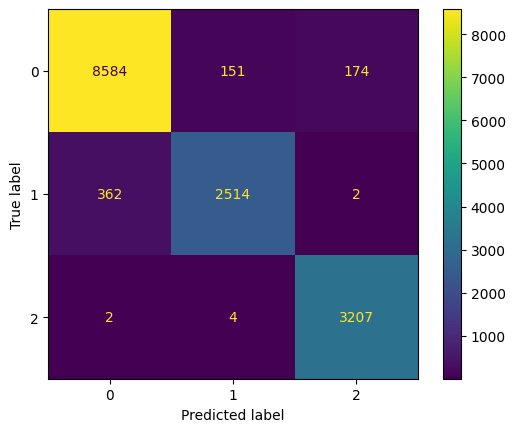

In [10]:
# Import da biblioteca matplotlib que tem como objetivo exibir, manipular
# e criar gráficos
import matplotlib.pyplot as plt

# Import da classe ConfusionMatrixDisplay do módulo metrics da biblioteca
# sklearn que tem como objetivo mostrar graficamente o desempenho do nosso
# modelo de classificação 
from sklearn.metrics import ConfusionMatrixDisplay

# Instância da classe ConfusionMatrixDisplay. O construtor da classe recebe
# como argumento:
# modelo: Classe LogisticRegression
# xtest: Caracteristicas utilizadas na predição
# ytest: Dados reais da classificação.
ConfusionMatrixDisplay.from_estimator(modelo, xtest, ytest)

# Ira exibir o gráfico na tela
plt.show()

                Interpretação da matriz de confusão

-> Valores na diagonal (8584, 2514, 3207): Quantidade de valores que o modelo
classificou corretamente em cada grupo (valor único do array numpy y).

-> Demais valores: Quantidade de valores que o modelo classificou incorretamente
em cada grupo. Por exemplo: O valor 362 (Linha 1, Coluna 0) significa que o modelo errou 362 vezes ao prever a Classe 0 quando, na verdade, os dados pertenciam à Classe 1

                        CLASSIFICADOR COM PCA (STELLAR)

In [11]:
# Import Importa o módulo decomposition que contém a classe PCA. 
from sklearn import decomposition

# Instância da classe PCA que recebe em seu construtor o argumento
# n_components que define a quantidade de componentes principais
# (colunas) que serão considerados na classificação dos dados.
pca = decomposition.PCA(n_components=10)

# fit_tranform: Irá aprender sobre os dados de treino e aplicará o pca
# nos dados de treino com o objetivo de definir a quantidade de componentes
# principais. Agora os dados de treino irão conter apenas os dados das colunas
# principais 
xtrain = pca.fit_transform(xtrain)

# Irá aplicar nos dados de caracteristicas os componentes principais
# definidos no conjunto de treino.
xtest = pca.transform(xtest)

Criando a regressão logistica usando o xtrain que contém o PCA

In [12]:
# Observação: Como ja importamos a biblioteca anteriormente, não será necessário
# importar novamente

# Instância da classe de Regressão Loistica. O construtor irá receber como
# argumento o solver (tipo de cálculo que o modelo realizara para classificar
# os dados) e o max_iter (que indica a quantidade de iterações ou execuções
# que o modelo deve fazer para classificar os dados). 
modelo = LogisticRegression(solver='lbfgs', max_iter=400)

# perf_counter: Irá pegar o tempo atual (inicio da execução do modelo) 
# da forma mais precisa que o sistema operacional pode nos proporcionar
tempo_inicial = time.perf_counter()

# Função da classe LogisticRegression que irá treinar o modelo usando os dados
# de treino.
modelo.fit(xtrain, ytrain)

# perf_counter: Irá pegar o tempo atual (fim da execução do modelo) 
# da forma mais precisa que o sistema operacional pode nos proporcionar
tempo_final = time.perf_counter()

# Impressão do tempo necessário de execução do modelo.
print("Tempo de treino: ", tempo_final - tempo_inicial)

Tempo de treino:  1.3734969000215642


Verificando o desempenho do modelo com PCA

In [13]:
print(round(modelo.score(xtest, ytest), 2),"%")

0.95 %


Construindo a matriz confusão do modelo que utiliza PCA

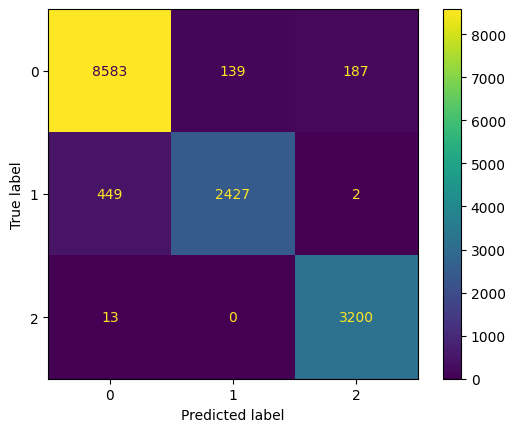

In [14]:
ConfusionMatrixDisplay.from_estimator(modelo, xtest, ytest)

plt.show()

 -> VISUALIZAÇÃO PCA: Vamos verificar a concentração dos dados nos componentes.
 Para isso, vamos reduzir ainda mais a dimensionalidade com o objetivo de tornar possivel a visualização dos dados no gráfico.

 -> Iremos reduzir mais ainda o xtrain de 10 para apenas 2.

In [15]:
# Import da classe PCA do módulo decomposition da biblioteca sklearn que tem
# como objetivo aplicar a redução de dimensionalidade (redução de colinas)
# em base de dados que contém muitas colunas.
from sklearn.decomposition import PCA

# Instância da classe PCA: O construtor da classe irá receber como
# argumento o n_components que tem como objetivo reduzir o xtrain
# (que antes já havia sido reduzido de 18 para 10 componentes) para
# apenas 2 componentes (colunas)
pca_view = PCA(n_components=2)

# Irá aprender novamente sobre os dados de treino e aplicará nos dados
# a redução de colunas (redução de dimensionalidade).
principal_componente = pca_view.fit_transform(xtrain)

# Observação: Não usaremos esse xtrain de 2 componentes para treinar o modelo,
# utilizaremos apenas para visualizar os dados no gráfico

# explained_variance_ratio_: Atributo da classe PCA que retorna um array floats
# (um para cada componente) que indica o percentual da variância total do
# dataset original que é capturada por cada componente principal. Exemplo:

# Se o resultado for [0.65, 0.15]:
# O PC1 captura 65% da informação (variância)
# O PC2 captura 15% da informação (variância)
# a soma (80%) é a informação total retida ao usar apenas 2 componentes

# Acessando o percentual da variância da primeira coluna
print("Percentual da variância da primeira coluna: ", pca_view.explained_variance_ratio_[0])

# Acessando o percentual da variância da segunda coluna

print("Percentual da variância da segunda coluna: ", pca_view.explained_variance_ratio_[1])

# Acessando a soma das variâncias utilizando a função sum do pandas
print("Soma do percentual de variância das 2 colunas: ", pca_view.explained_variance_ratio_.sum())

Percentual da variância da primeira coluna:  0.2852806463852205
Percentual da variância da segunda coluna:  0.21277765852270678
Soma do percentual de variância das 2 colunas:  0.49805830490792724


Transformando o array o pca_view em um dataset com o objetivo de construir
o gráfico

In [16]:
# Vamos utilizar a função DataFrame do pandas que tem como objetivo converter
# arrays em dataframe. A função irá receber como argumento:

# data = principal_componente: Irá conter os valores que irão compor o
# DataFrame. Esse argumento terá como valor a variável principal componente
# (variável que contém o xtrain reduzido em apenas 2 componentes)

# columns: Irá receber uma array que contém o nome de cada lista. 
principal_componente_df = pd.DataFrame(data=principal_componente, columns=['principal component 1', 'principal component 2'])

Visualizando o DataFrame

In [17]:
principal_componente_df

,principal component 1,principal component 2
0,1.244253,-0.159775
1,-3.416833,0.466016
2,0.772182,-0.061215
3,-1.438482,0.265928
4,-3.594194,0.421027
...,...,...
84995,-2.597813,0.228668
84996,-2.716478,0.419988
84997,-0.499818,0.158206
84998,1.283668,-0.097278


Agora, precisamos transformar os rotulos numéricos de ytrain(que foi convertido para o tipo numérico quando usamos o label encoder no y
que depois foi convertido em ytrain e ytest) em rotulos categóricos novamente. Vamos fazer isso com o objetivo de tornar a visualização dos rótulos mais clara.

In [ ]:
# Vamos usar a função where do numpy que tem como objetivo substituir valores
# com base em uma condição.

# ytrain = : Variável que irá receber a substituição de valores
# ytrain == rótulo da coluna: Condição que irá guiar a substituição de valores
# 'Galaxy: Valor que irá substituir o 0
# ytrain: Array que terá os valores substituidos.
# Observação: O NumPy vê o array ytrain originalmente como númérico. Para
# acomodar a string, ele converte todo o array para um tipo de dado que pode
# conter strings. Agora, os valores que ainda não foram substituidos (o número
# 1 e o número 2) já estão armazendos como as stringes '1' e '2'. Portanto,
# devemos usar aspas simples ('1') para fazer a comparação de strings. 

ytrain = np.where(ytrain == 0, 'GALAXY', ytrain)

ytrain = np.where(ytrain == '1', 'QSO', ytrain)

ytrain = np.where(ytrain == '2', 'STAR', ytrain)

Construindo o gráfico de pontos

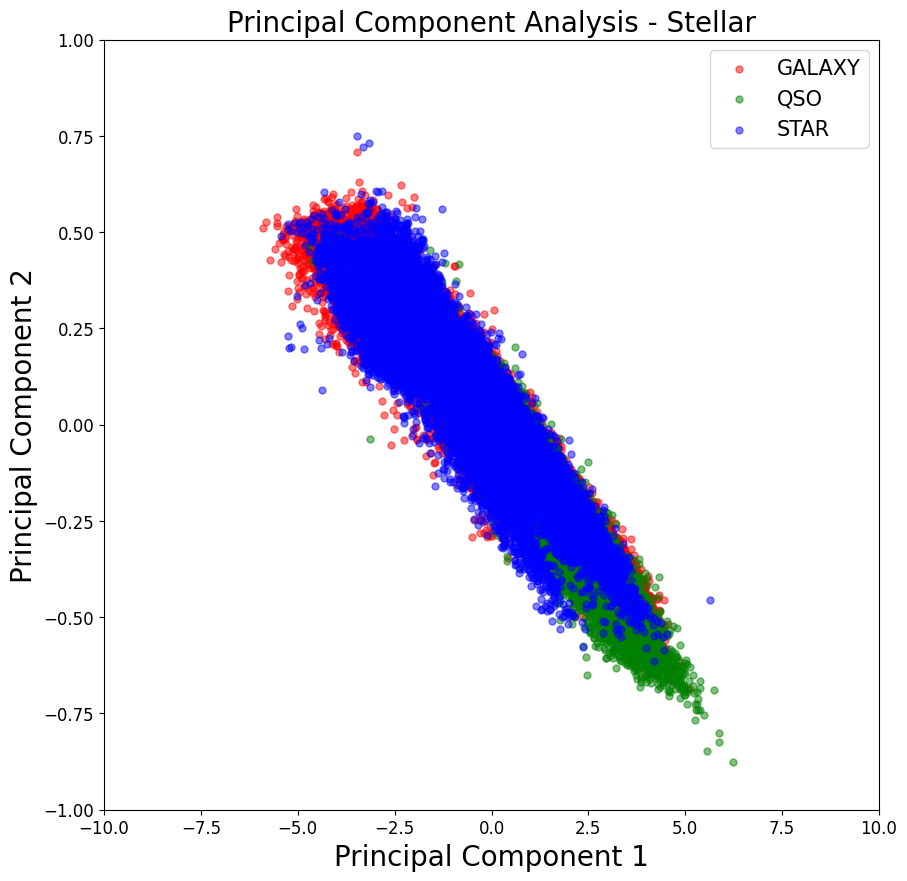

In [23]:
# Ira construir a figura que conterá o gráfico
plt.Figure()
# Ira definir o tamanho da figura do gráfico (largura e altura)
plt.figure(figsize=(10,10))
# Define o tamanho dos valores presentes no eixo x
plt.xticks(fontsize=12)
# Define o tamanho dos valores presentes no eixo y
plt.yticks(fontsize=12)

# Função do matplotlib que tem como objetivo nomear o eixo x e 
# definir o tamanho da fonte do rótulo.
plt.xlabel('Principal Component 1', fontsize=20)

# Função do matplotlib que tem como objetivo nomear o eixo y e 
# definir o tamanho da fonte do rótulo.
plt.ylabel('Principal Component 2', fontsize=20)

# Ira definir os limites minimos e máximos dos eixo x e y
plt.xlim(-10, 10)
plt.ylim(-1, 1)

# Irá definir o titulo do grafico com tamanho da fonte 20.
plt.title("Principal Component Analysis - Stellar", fontsize=20)

# Lista que irá conter os rótulos do array que iremos utilizar na construção
# do gráfico
targets = ['GALAXY', 'QSO', 'STAR']

# Lista de cores que irão compor o gráfico
colors = ['r', 'g', 'b']

# O objetivo desse for é iterar sobre as classes e suas cores correspondentes
# para plotar cada grupo de dados separadamente no gráfico.
# zip: O zip é uma função do python que tem como objetivo combinar 2 listas
# criando pares de valores (utilizando os valores das listas que serão combina
# das), por exemplo: 

# 1ª,Posição 0,"('GALAXY', 'r')"
# 2ª,Posição 1,"('QSO', 'g')"
# 3ª,Posição 2,"('STAR', 'b')"
for target, color in zip(targets, colors):
    
    # cria uma máscara booleana que será usada para isolar e plotar apenas os pontos de dados que pertencem à classe atual na iteração.
    
    # ytrain == target: Realiza uma comparação booleana elemento por elemento entre o array ytrain e a string armazenada em target (ex: 'GALAXY'). O resultado é um novo array (a máscara) com o mesmo tamanho de ytrain, preenchido apenas com True ou False.
    
    # indices: Armazena o resultado dessa comparação na variável indices. Se target é 'GALAXY', a variável indices será True onde a classe real é 'GALAXY' e False em todos os outros lugares.
    indices = ytrain == target
    
    # Função que irá plotar os pontos no gráfico. A função irá receber como
    # argumento:
    
    # principal_componente_df.loc[indices, 'principal component 1']: Ira conter
    # os valores (pontos) do eixo x do gráfico.
    
    # loc: Função do pandas que tem como objetivo selecionar um intervalo de 
    # valores. Ela recebe como argumento o intervalo de linhas e o intervalo de
    # colunas.
    
    # indices: Irá selecionar todas as linhas que são True (linhas que contém
    # os rótulos descritos no target que representa os valores do gráfico).
    
    # principal_componente_df.loc[indices, 'principal component 2']: Irá representar os valores do eixo y.
    
    # c: Ira conter a paleta de cores dos pontos definidos na lista color.
    
    # s: Define o tamanho dos pontos presentes no gráfico.
    
    # alpha: Define o nivel de transparência/opacidade dos pontos. Os valores
    # vão de 0 a 1.
    plt.scatter(principal_componente_df.loc[indices, 'principal component 1'],
                principal_componente_df.loc[indices, 'principal component 2'],
                
                c = color, s = 25, alpha = 0.5)

# Irá definir a legenda do gráfico usando os valores definidos no target(rótulos dos valores). O argumento prop define o tamanho da legenda no 
# gráfico. 
plt.legend(targets, prop = {'size': 15})

# Irá exibir o gráfico na tela.
plt.show()    

                        Interpretação do Gráfico
-> Galaxy: Possui boa parte dos dados na parte positiva do 2° componente(os dados vão até o valor 50% do segundo componente). Já no 1° componente os dados
ficam concentrados na parte negativa (que seriam os 60% da parte negativa
do 1° componente).

-> Star: Esta bem distribuido nos 2 componentes, onde ele ocupa 50% da variância no 2° componentes (parte positiva do componentes) e 60% da variância no 1° componente.

-> QSO: Possui boa parte dos seus dados concentradas no componente 1 (até o valor 60%) na parte positiva. Já no 2° componente, podemos observar que os
valores ficam concentrados na parte negativa (75%)